# Discrete Fourier Transform

## Always Keep In Mind:
- Why does the algorithm converge/not converge?
- Could the algorithm be more efficient? Why/why not?
- Are there alternative algorithms? Do they converge better?
- Try to explain your observations either mathematically or in a rigorous computational fashion.
- What do you observe? What is your personal interpretation of the results?
***

### DFT Definition

The Discrete Fourier Transform (DFT) is often used for numerical computation in digital signal processing. There exists a multitude of applications, which be optimised by using the various properties of the DFT, namely:

- Periodicity
- Complex Conjugate
- Multiplication
- Parseval's Theorem
- Symmetry

These will be explored and applied to optimise the DFT throughout this report. In real world applications, signals are sampled using sensors to measure various signals, this sampling rate is extremely important and will be explored further in this report. These discretized value are then used to shift from a time-domain to a frequency-domain using the DFT represented below.
<br>
<br>
<div align="center">
$X_k= \sum_{n=0}^{N-1} x_n . e^{{-i 2 \pi k n}/{N}}$ 
</div>
<br>
<br>
The signal can be sent back from the frequency domain to the time domain using the Inverse Direct Fourier Transform represented below.
<br>
<br>
<div align="center">
$x_n= \frac{1}{N} \sum_{k=0}^{N-1} X_k . e^{{i 2 \pi n  k}/{N}}$ 
</div>
<br>

***




### Question 1
Implement the discrete Fourier transform of a set of pairs outlined below. Test on easy cases and plot the corresponding interpolating trigonometric polynomial.
<div>
<div align="center">
<br>
 $(x_j,y_j = f(x_j)), $   &nbsp;    $ x_j = \frac{2 j \pi}{n+1} , $   &nbsp;   $ 0 \leq j \leq n $ 
<br>
<br>
</div>

### !!!!!!!!STILL NEED TO DO THE INTERPOLATING POLY

In [10]:
import numpy as np

#Evaluation of the Discrete Fourier Transform
def DFT(x):
    #Variables Initiated
    N = len(x)
    y_s = []
    y_a = []
    y_b = []
    
    for k in range(N):  # For each output element
        s = complex(0)
        for n in range(N):  # For each input element
            angle = 2j * np.pi * n * k / N
            s += x[n] * np.exp(-angle)
        y_s.append(s)
        #y_a.append(round(s.real,2))
        #y_b.append(round(s.imag,2))
        
    #return [y_s, y_a, y_b];
    return y_s;

In [11]:
np.allclose(DFT(x), np.fft.fft(x))

True

<IPython.core.display.Javascript object>


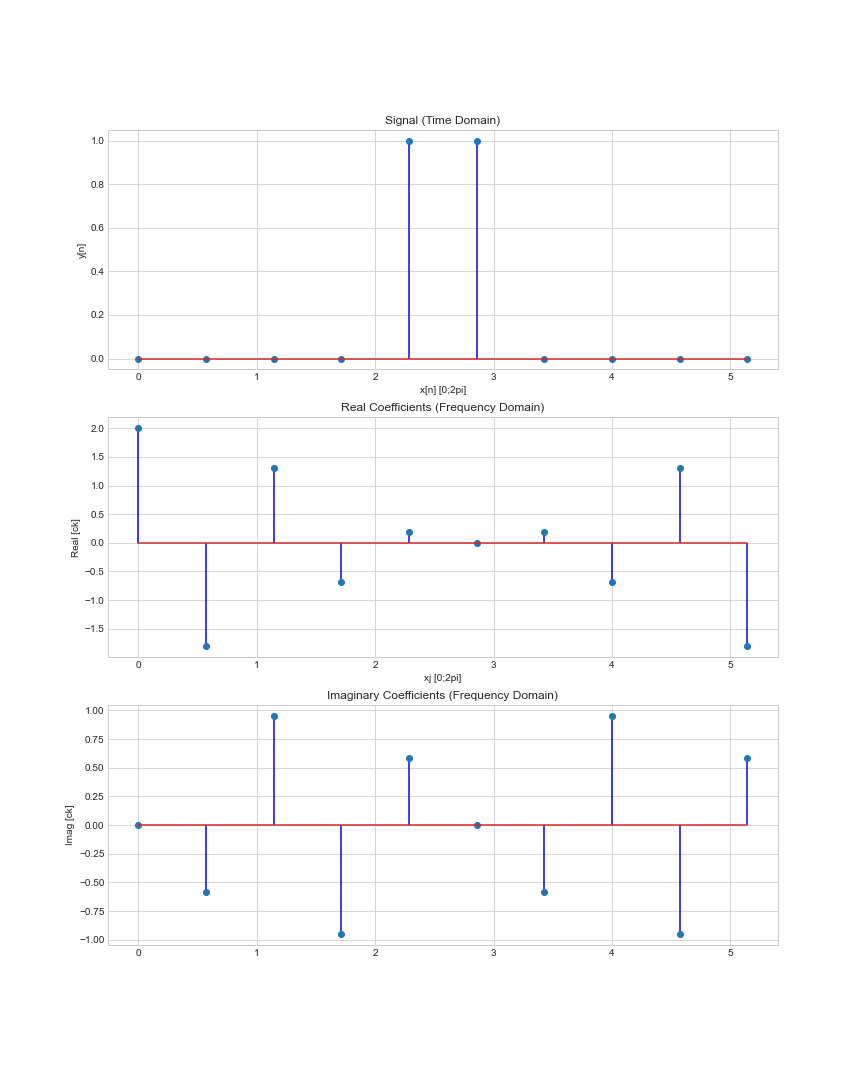

In [499]:
import numpy as np
import matplotlib.pyplot as plt

n = 10

#Discretization of the input signal
x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))

#Input signal generation
x = []
for j in range(0,n):
    x.append(0)
x[4] = 1
x[n-5] = 1

#DFT function called
X = DFT(x)
#X = np.fft.fft(x)
#np.allclose(DFT(x), np.fft.fft(x))

#Figure Size set
fig, axs = plt.subplots(3)
fig.set_size_inches(12,15)
#fig.suptitle('Sharing both axes')

#Graphs Plotted Signal[1], Real Coefficients[2] & Imaginary Coefficients[2]
axs[0].title.set_text('Signal (Time Domain)')
axs[0].stem(x_j,x, 'b-', use_line_collection=True)
axs[0].set_xlabel('x[n] [0;2pi]')
axs[0].set_ylabel('y[n]')
axs[1].title.set_text('Real Coefficients (Frequency Domain)')
axs[1].stem(x_j,np.real(X), 'b-', use_line_collection=True); 
axs[1].set_xlabel('xj [0;2pi]')
axs[1].set_ylabel('Real [ck]')
axs[2].title.set_text('Imaginary Coefficients (Frequency Domain)')
axs[2].stem(x_j,np.imag(X), 'b-', use_line_collection=True); 
axs[2].set_xlabel('xj [0;2pi]')
axs[2].set_ylabel('Imag [ck]')

#plt.subplot_tool()

plt.show()


# This part is to help visualize the data, can be ignored

In [18]:
import pandas as pd
df = pd.DataFrame ({'x_j': x_j})
df['DFT(x)']= X
df['fft']=np.fft.fft(x)
df

,x_j,DFT(x),fft
0,0.000000,2.000000e+00+0.000000e+00j,2.000000e+00+0.000000e+00j
1,0.571199,-1.809017e+00-5.877853e-01j,-1.809017e+00-5.877853e-01j
2,1.142397,1.309017e+00+9.510565e-01j,1.309017e+00+9.510565e-01j
3,1.713596,-6.909830e-01-9.510565e-01j,-6.909830e-01-9.510565e-01j
4,2.284795,1.909830e-01+5.877853e-01j,1.909830e-01+5.877853e-01j
5,2.855993,0.000000e+00-1.224647e-16j,-1.110223e-16+5.551115e-17j
6,3.427192,1.909830e-01-5.877853e-01j,1.909830e-01-5.877853e-01j
7,3.998391,-6.909830e-01+9.510565e-01j,-6.909830e-01+9.510565e-01j
8,4.569589,1.309017e+00-9.510565e-01j,1.309017e+00-9.510565e-01j
9,5.140788,-1.809017e+00+5.877853e-01j,-1.809017e+00+5.877853e-01j


In [478]:
np.allclose(DFT(x), np.fft.fft(x))

True

# Interpolating Polynomial

### $$P_M(x)= \sum_{k=-M}^{M} c_k*e^{ikx_j}  $$

### $$ c_k= \frac{1}{n+1} \sum_{j=0}^{n} f(x_j)e^{-ikx_j} $$

Here's the approach I was thinking about. I haven't tried it yet,I'm not so sure if it'd work.

1. Find the matrix of $ c_k $ values: (in other words) if $Ax_j = DFT(x)$  then $x_j = A^{-1} DFT(x)$ , can we find A? since we have $x_j$ and $DFT(x)$ ?

2. Compute polynomials using $c_k$ and formula 1?


In [488]:
%timeit DFT(x)
%timeit np.fft.fft(x)

214 µs ± 5.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.89 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## !!!!!!!!!!!ENTER Q1 CONCLUSION HERE
DFT with for loop (Tom version) very slow - fft 25 times faster. **Apllied to binary pairs**

STUDY:
1. Speed by experimenting and seeing how computation time increases with n
2. Deduce Complexity of it
3. Do it for a **binary input** signal 


numpy fft is super fast as its written in fortran, a low-level algorithm compared to python, on top of this we're usinf a lot of python-stack recursion and allocation of temporary arrays. 

To make faster, one should vectorize repeated computations to remove the recursive functions that are currently used.

***

### Question 2
Apply it to the function $f:[0, 2\pi] \to \mathbb{R}$ be defined by
<br>
<br>
$$f(0) = f(2\pi) = 1$$
<div align="center">
$f(x) = 0$  <i>otherwise</i> 
</div>
<br>
Let $ M \in \mathbb{N}, n = 2M,$ <i>and</i>
<br>
<div align="center">
$x_j = \frac{2 j \pi}{n+1}$ &nbsp; $j=0,...,n$
</div>
<br>
What are your conclusions? 

<IPython.core.display.Javascript object>


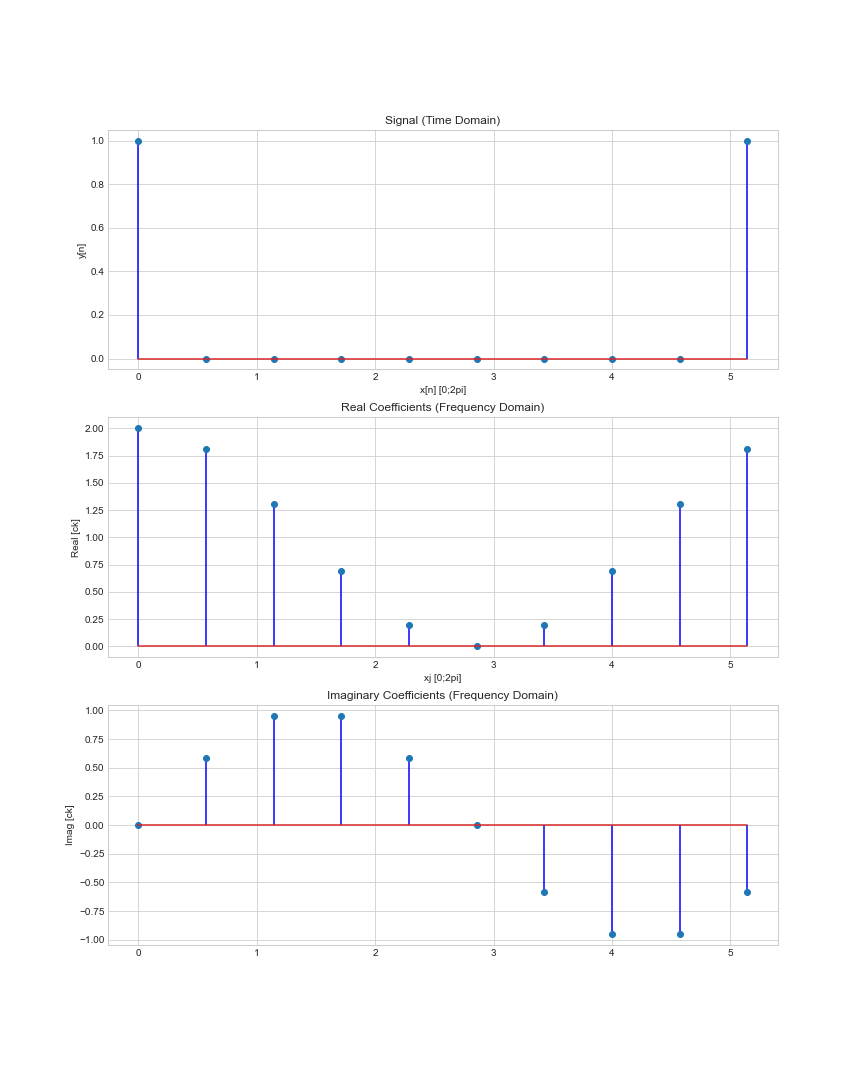

In [498]:
import numpy as np
import matplotlib.pyplot as plt

n = 10

x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))
    
x = []
for j in range(0,n):
    x.append(0)
x[0] = 1
x[n-1] = 1

X = DFT(x)
#X = np.fft.fft(x)
#np.allclose(DFT(x), np.fft.fft(x))

#Figure Size set
fig, axs = plt.subplots(3)
fig.set_size_inches(12,15)
#fig.suptitle('Sharing both axes')

#Graphs Plotted Signal[1], Real Coefficients[2] & Imaginary Coefficients[2]
axs[0].title.set_text('Signal (Time Domain)')
axs[0].stem(x_j,x, 'b-', use_line_collection=True)
axs[0].set_xlabel('x[n] [0;2pi]')
axs[0].set_ylabel('y[n]')
axs[1].title.set_text('Real Coefficients (Frequency Domain)')
axs[1].stem(x_j,np.real(X), 'b-', use_line_collection=True); 
axs[1].set_xlabel('xj [0;2pi]')
axs[1].set_ylabel('Real [ck]')
axs[2].title.set_text('Imaginary Coefficients (Frequency Domain)')
axs[2].stem(x_j,np.imag(X), 'b-', use_line_collection=True); 
axs[2].set_xlabel('xj [0;2pi]')
axs[2].set_ylabel('Imag [ck]')

#plt.subplot_tool()

plt.show()

In [483]:
np.allclose(DFT(x), np.fft.fft(x))

True

In [490]:
%timeit DFT(x)
%timeit np.fft.fft(x)

220 µs ± 6.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.45 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## !!!!!!!!!!!ENTER Q2 CONCLUSION HERE
DFT with for loop (Tom version) very slow - fft 25 times faster. **Apllied to binary pairs**
Computation time increases with more binary pairs - as expected

***

### Question 3
Apply it to the function $f:[0, 2\pi] \to \mathbb{R}$ be defined by $f(x) = \sin(2x).$ &nbsp; $For M \in \mathbb{N}, n=2M, and$
<br>
<br>
<div align="center">
$x_j = \frac{2 j \pi}{n+1}$ &nbsp; $j=0,...,n$
</div>
<br>
Discuss Shannon’s theorem. Illustrate the aliasing phenomenon for $ f(x)  = \sin(x) + \sin(5x)$ with 9 nodes. How many nodes do we need for an exact representation of $ f(x)  = \cos(x) + \cos(5x)$

#### Shannon Theorem

Claude Shannon furthered research in 1948 carried out by Harry Nyquist. He conclusively proved that there exists a limit to the amount of noise that can be present in a signal for it to be succesfully transmitted across a communications channel experiencing random data transmission errors (Nyquist-Shannon limit).

Together Nyquist & Shannon provided us with the notions to sample a continuous sample, transmit a discrete signal across a communications channel and reconstruct it successfully upon reception. This sampling rate can be described as:

<div align="center">
<br>
 $Sampling Frequency$   &nbsp;    $(f_s) > 2(B)$   &nbsp;   $Highest Frequency$
<br>
</div>

A continuous-time signal of finite bandwidth can then sampled without aliasing issues as shown in the diagrams below.
<br>
<div align="center">
<h5>Aliased signal (Reconstruction Impossible)<h/3>
<br>
<p><a href="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/AliasedSpectrum.png/400px-AliasedSpectrum.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/AliasedSpectrum.png/400px-AliasedSpectrum.png" alt="Alt Text" title="Ola"></a></p>
</div>
<br>
<br>
<div align="center">
<h5>Correctly Sampled Signal (Reconstruction Possible)<h/3>
<br>
<p><a href="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/ReconstructFilter.png/400px-ReconstructFilter.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/ReconstructFilter.png/400px-ReconstructFilter.png" alt="Alt Text" title="Optional Title"></a></p>
</div>

<IPython.core.display.Javascript object>


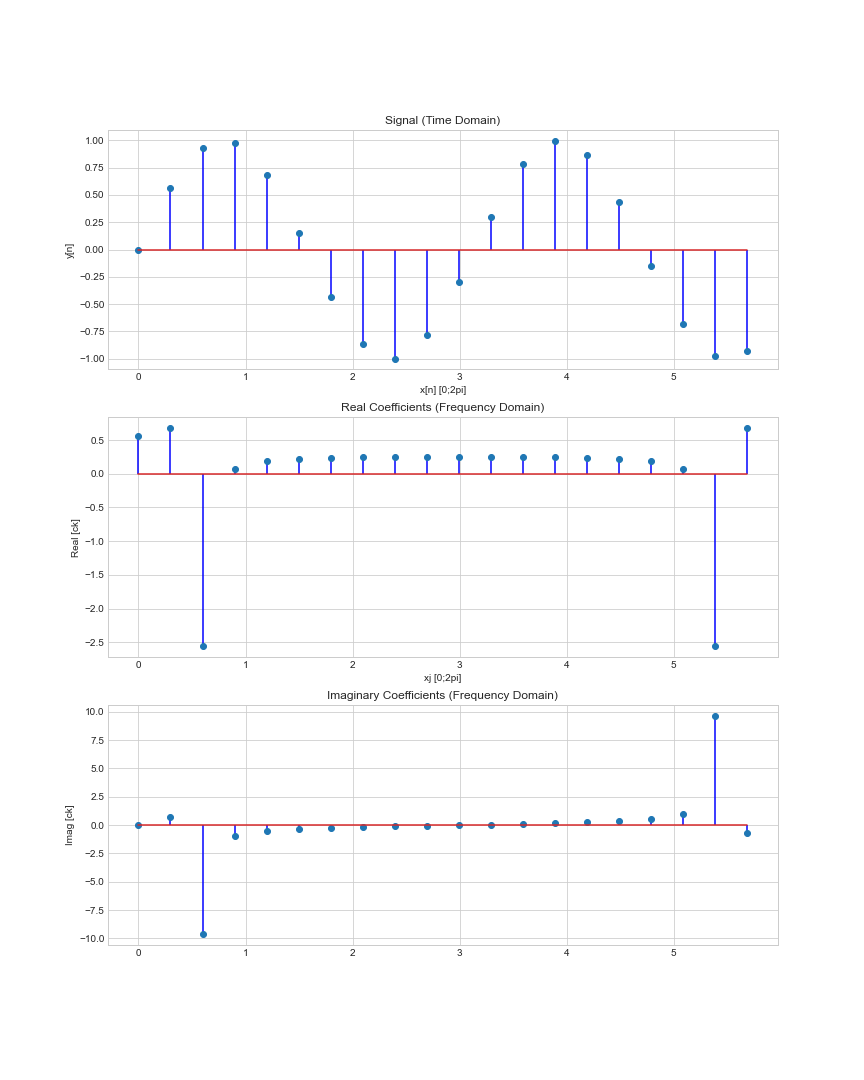

In [497]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))
    
x = []
for j in range(0,n):
    x.append(np.sin(2000000*x_j[j]))
    
X = DFT(x)
#X = np.fft.fft(x)
#np.allclose(DFT(x), np.fft.fft(x))

#Figure Size set
fig, axs = plt.subplots(3)
fig.set_size_inches(12,15)
#fig.suptitle('Sharing both axes')

#Graphs Plotted Signal[1], Real Coefficients[2] & Imaginary Coefficients[2]
axs[0].title.set_text('Signal (Time Domain)')
axs[0].stem(x_j,x, 'b-', use_line_collection=True)
axs[0].set_xlabel('x[n] [0;2pi]')
axs[0].set_ylabel('y[n]')
axs[1].title.set_text('Real Coefficients (Frequency Domain)')
axs[1].stem(x_j,np.real(X), 'b-', use_line_collection=True); 
axs[1].set_xlabel('xj [0;2pi]')
axs[1].set_ylabel('Real [ck]')
axs[2].title.set_text('Imaginary Coefficients (Frequency Domain)')
axs[2].stem(x_j,np.imag(X), 'b-', use_line_collection=True); 
axs[2].set_xlabel('xj [0;2pi]')
axs[2].set_ylabel('Imag [ck]')

#plt.subplot_tool()

plt.show()

## !!!!!!!!!!!ENTER Q3 (sinx ) CONCLUSION HERE
STUDY:
1. Speed by experimenting and seeing how computation time increases with n
2. Deduce Complexity of it
3. Do it for a **periodic** signal
***

<IPython.core.display.Javascript object>


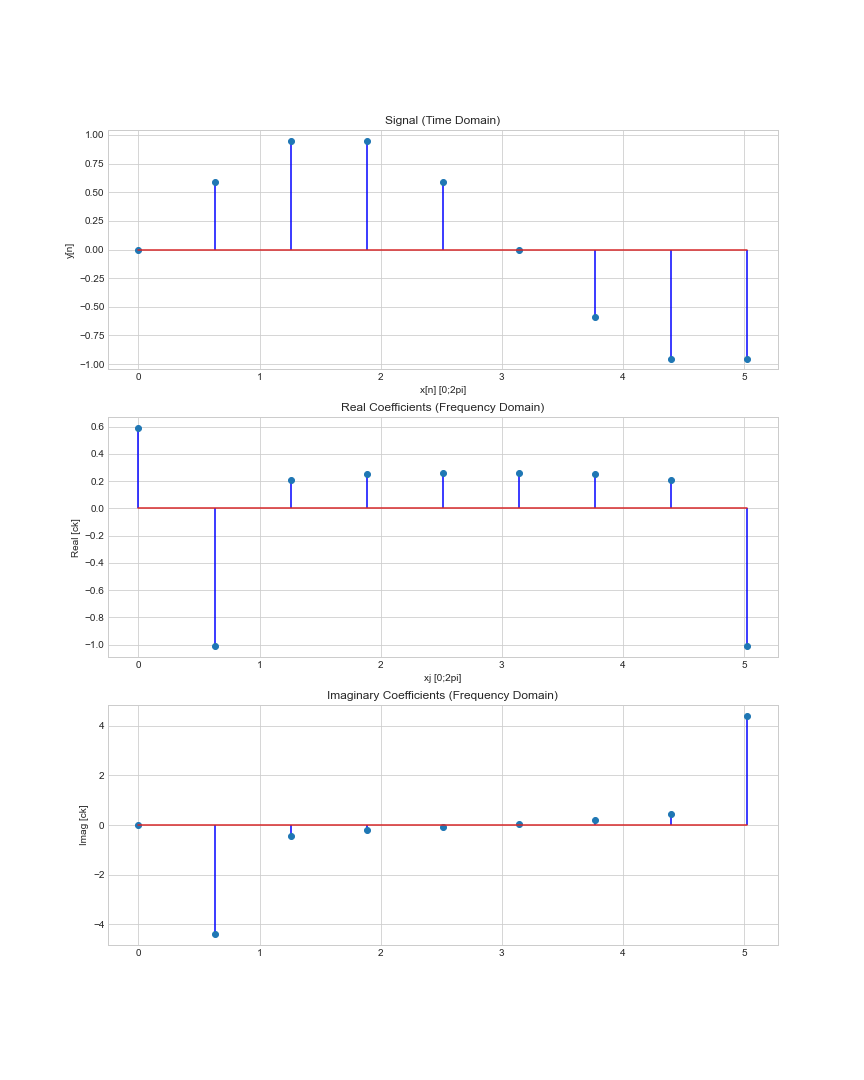

In [496]:
import numpy as np
import matplotlib.pyplot as plt

n = 9

x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))
    
x = []
for j in range(0,n):
    x.append(np.sin(x_j[j])+np.sin(5*x_j[j]))
    #x.append(np.sin(50*x_j[j]))
X = DFT(x)
#X = np.fft.fft(x)
#np.allclose(DFT(x), np.fft.fft(x))

#Figure Size set
fig, axs = plt.subplots(3)
fig.set_size_inches(12,15)
#fig.suptitle('Sharing both axes')

#Graphs Plotted Signal[1], Real Coefficients[2] & Imaginary Coefficients[2]
axs[0].title.set_text('Signal (Time Domain)')
axs[0].stem(x_j,x, 'b-', use_line_collection=True)
axs[0].set_xlabel('x[n] [0;2pi]')
axs[0].set_ylabel('y[n]')
axs[1].title.set_text('Real Coefficients (Frequency Domain)')
axs[1].stem(x_j,np.real(X), 'b-', use_line_collection=True); 
axs[1].set_xlabel('xj [0;2pi]')
axs[1].set_ylabel('Real [ck]')
axs[2].title.set_text('Imaginary Coefficients (Frequency Domain)')
axs[2].stem(x_j,np.imag(X), 'b-', use_line_collection=True); 
axs[2].set_xlabel('xj [0;2pi]')
axs[2].set_ylabel('Imag [ck]')

#plt.subplot_tool()

plt.show()


## !!!!!!!!!!!ENTER Q3 (cumulative (+) sinx)  CONCLUSION HERE
STUDY:
1. Shown aliasing
***

<IPython.core.display.Javascript object>


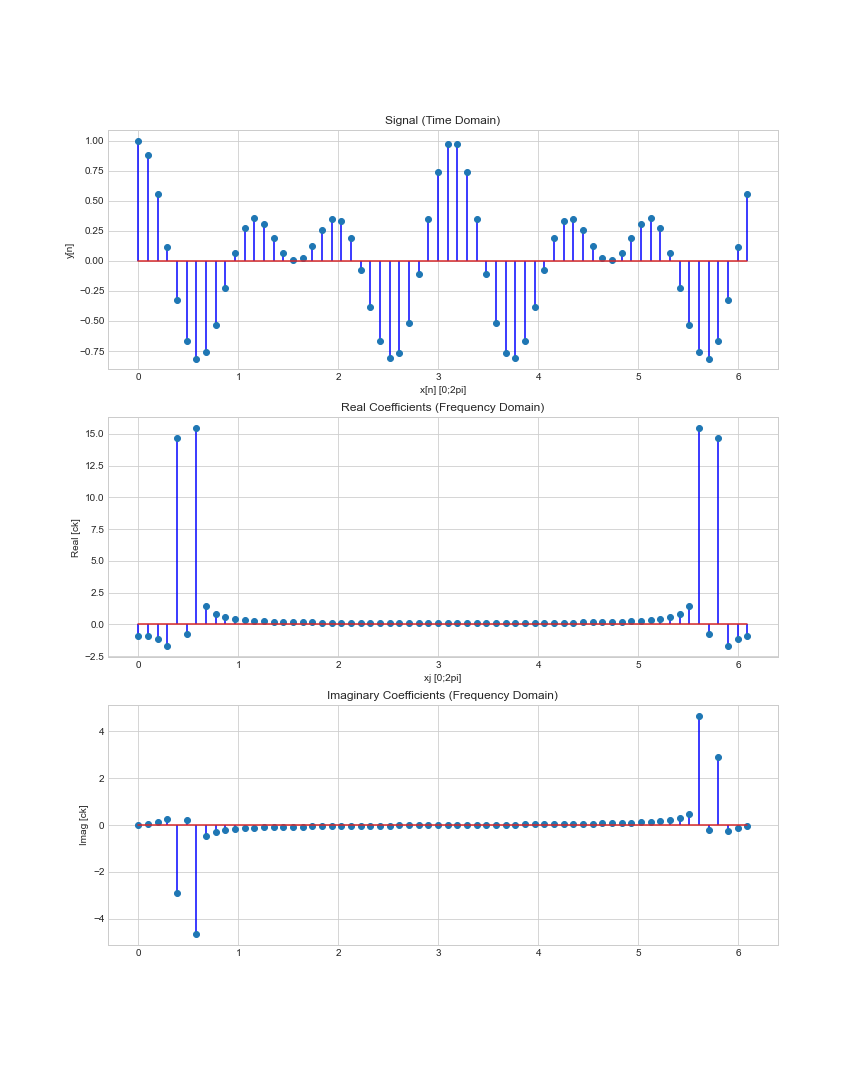

In [495]:
import numpy as np
import matplotlib.pyplot as plt

n = 64

x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))
    
x = []
for j in range(0,n):
    x.append(np.cos(x_j[j])*np.cos(5*x_j[j]))
    
X = DFT(x)
#X = np.fft.fft(x)
#np.allclose(DFT(x), np.fft.fft(x))

#Figure Size set
fig, axs = plt.subplots(3)
fig.set_size_inches(12,15)
#fig.suptitle('Sharing both axes')

#Graphs Plotted Signal[1], Real Coefficients[2] & Imaginary Coefficients[2]
axs[0].title.set_text('Signal (Time Domain)')
axs[0].stem(x_j,x, 'b-', use_line_collection=True)
axs[0].set_xlabel('x[n] [0;2pi]')
axs[0].set_ylabel('y[n]')
axs[1].title.set_text('Real Coefficients (Frequency Domain)')
axs[1].stem(x_j,np.real(X), 'b-', use_line_collection=True); 
axs[1].set_xlabel('xj [0;2pi]')
axs[1].set_ylabel('Real [ck]')
axs[2].title.set_text('Imaginary Coefficients (Frequency Domain)')
axs[2].stem(x_j,np.imag(X), 'b-', use_line_collection=True); 
axs[2].set_xlabel('xj [0;2pi]')
axs[2].set_ylabel('Imag [ck]')

#plt.subplot_tool()

plt.show()


## !!!!!!!!!!!ENTER Q3 (cosx multiplication) CONCLUSION HERE
STUDY:
1. Identify Nyquist limit of signal
2. Should abide by multiplication property, show it in graph. A multiplication in time represents a circular convoution in frequency domain
<br>
<br>
$$x(n)h(n) \leftrightarrow \frac{1}{N}X(k) \ast H(k) $$ 
***

#### Cooley-Tukey

Friedrich Gauss developed the numerical algorithm in 1805, it was then rediscovered and applied to digital signals by J.W. Cooley & John Tukey in 1965. The algorithm capitalizes on the symmetry present in the DFT equation to reduce the computational costs of evaluating it.

The first step involves, splitting the DFT calculation into even and odd terms as shown below:

\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~(2m)~/~N} + \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~(2m + 1)~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~m~/~(N/2)} + e^{-i~2\pi~k~/~N} \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~m~/~(N/2)}
\end{align}

The second step involves using the fact that $M = \frac{N}{2}$ to only compute half of the sums. This reduces our computation from order $N^2$ to order $M^2$. 

Finally, we repeat the steps above as long as M is even within the subsystems, this effectively halves the computational costs until the arrays reduce in size so much that it is no longer beneficial. The final computational speed is of order $Nlog(N)$, the same as a Fast Fourier Transform (FFT).
<br>
***

### Question 4
Improve the implementation using a simple form of Cooley-Tukey’s algorithm (Ref 1). Hint: assume that $n + 1$ is a power of 2, in particular $n$ is odd ($n = 2M - 1$), see (Ref 19), and using periodicity compute $ck$ for indices$ k = 0; ...; n$. Discuss the computer effort in comparison with the basic implementation.

In [371]:
def Cooley_Tukey(x):
    #Cooley-Tukey FFT (Recursive)
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized dependent on the size of x
        return DFT(x)
    else:
        X_even = Cooley_Tukey(x[::2])
        X_odd = Cooley_Tukey(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd, 
                               X_even + factor[N // 2:] * X_odd])        
        

In [378]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024

x_j = []
for j in range(0,n):
    x_j.append((2*np.pi*j)/(n+1))
    
x = []
for j in range(0,n):
    x.append(np.cos(x_j[j])*np.cos(5*x_j[j]))
    
#np.allclose(Cooley_Tukey(x), np.fft.fft(x))
%timeit DFT(x)
%timeit Cooley_Tukey(x)
%timeit np.fft.fft(x)

5.91 s ± 333 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
171 ms ± 8.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
117 µs ± 793 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## !!!!!!!!!!!ENTER Q4 CONCLUSION HERE
STUDY:
1. Optimise the cutoff for 3 different sizes of x
2. 
<br>
***

### Question 5 
Illustrate the effect of truncating the discrete Fourier transform (i.e. omitting high frequencies). Discuss some applications in signal compression.



## !!!!!!!!!!!!!CHANGE BELOW!!!!!!!!!!
The high frequencies contribute to the fast varying parts of the signal(the sharp transitions), while the low frequencies contribute to the slow variations of the signal in the time domain.

In [ ]:
The high frequencies contribute to the fast varying parts of the signal(the sharp transitions), while the low frequencies contribute to the slow variations of the signal in the time domain.

### Question 6
Implement the discrete Fourier transform in two dimensions Ref 1), first in a basic way then optionally in an improved way inspired from question 4.

### Question 7
Show the effect of truncating the DFT on greyscale images. Give illustrations in the context of image denoising / compression.

### Question 8 
Possible continuation: FFT for solving linear PDEs with applications in image denoising. To be discussed with us.